# 08/03/20 - This notebook looks at the mathematical formulation of the thin lens and SIS approximations in response to the fifth referee report.
### Taking into account the different fits for velocity disperions (low and int redshift), I compute the ratios as such:

$\sigma_{TL}/\sigma_{SIS,lowz,himass} = (57.4 Mpc)^{1/2} (M_*/M_{\odot})^{0.039} (D_S/D_L)^{1/2} (1/D_L)^{1/2}$
$\sigma_{TL}/\sigma_{SIS,lowz,lowmass} = (1.90\times10^6 Mpc)^{1/2} (M_*/M_{\odot})^{-0.181} (D_S/D_L)^{1/2} (1/D_L)^{1/2}$
and
$\sigma_{TL}/\sigma_{SIS,intz} = (19.1 Mpc)^{1/2}) (M_*/M_{\odot})^{0.063
} (D_S/D_L)^{1/2} (1/D_L)^{1/2}$
## Edited 08/04/20
## Edited 08/06/20

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as colors
import matplotlib.text as text
import matplotlib.lines as lines
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
#from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM, z_at_value

c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
cosmo = FlatLambdaCDM(h0, Om0=0.262)

In [2]:
# create datapaths for files and figures
csv_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/'
png_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/'
pdf_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/lambdar_revisions/'

In [3]:
### Samples as of 08/03/20
spec = pd.read_csv(f'{csv_path}spec_lambdar_revisions_063020.csv')
mac = pd.read_csv(f'{csv_path}mac_lambdar_revisions_063020.csv')
zoo = pd.read_csv(f'{csv_path}zoo_lambdar_revisions_063020.csv')

In [4]:
# I want values of DL from z=0 to z=1.0
cosmo.angular_diameter_distance(1.0)
# or 0 to ~1600 Mpc

<Quantity 1603.84916185 Mpc>

In [5]:
cosmo.angular_diameter_distance(0.5)

<Quantity 1210.41390029 Mpc>

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


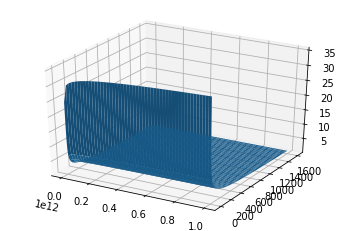

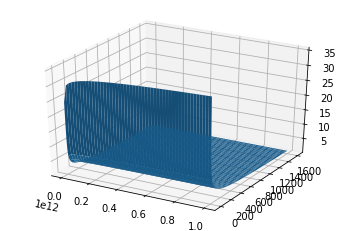

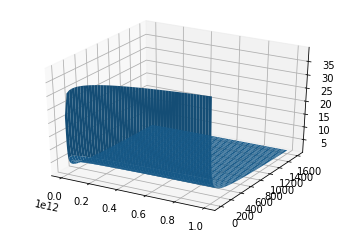

In [6]:
B_low_high = (57.4)**(1/2) # Mpc^1/2
B_low_low = (1.90*10**5)**(1/2)
B_int = (19.1)**(1/2)

def ratio_low_high(M, D_L):
    return B_low_high * M**(0.039) * 2 * (1/D_L)**(1/2)
def ratio_low_low(M, D_L):
    return B_low_low * M**(-0.181) * 2 * (1/D_L)**(1/2)
def ratio_int(M, D_L): 
    return B_int * M**(0.063) * 2 * (1/D_L)**(1/2)

D_L = np.linspace(0, 1600, 1000)
M = np.linspace(10**8, 10**12, 1000)

X, Y = np.meshgrid(M, D_L)

f_low_low = ratio_low_high(X, Y)
f_low_high = ratio_low_high(X,Y)
f_int = ratio_int(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z=f_low_high)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z=f_low_low)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z=f_int)
#ax.view_init(15, 45)



Text(0.5, 1.0, 'Einstein Radius Estimates - Thin Lens vs SIS')

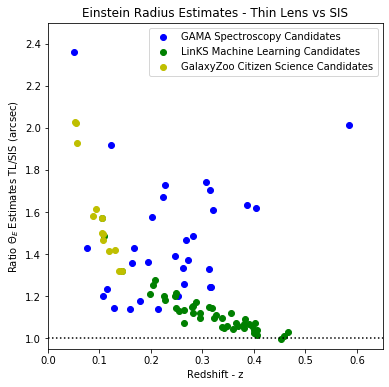

In [7]:
 # plot ratios as a function of redshift
x = np.linspace(0, 0.65, 100)
    
fig = plt.figure(figsize=(6,6))
ax = fig.subplots()
ax.scatter(spec.z_lens, spec.theta_e_pm/spec.theta_e_sis,
          label='GAMA Spectroscopy Candidates',
          color = 'b')
ax.scatter(mac.z, mac.theta_e_pm/mac.theta_e_sis,
           label='LinKS Machine Learning Candidates',
          color = 'g')
ax.scatter(zoo.z, zoo.theta_e_pm/zoo.theta_e_sis,
            label='GalaxyZoo Citizen Science Candidates',
          color = 'y')
ax.set_ylabel('Ratio $\Theta_E$ Estimates TL/SIS (arcsec)')
ax.set_xlabel('Redshift - z')
ax.set_ylim(0.95, 2.5)
ax.set_xlim(0, 0.65)

ax.axhline(1.0,
        linestyle = ':',
          color='k')


ax.legend()
plt.title('Einstein Radius Estimates - Thin Lens vs SIS')

#plt.savefig(f'{pdf_path}/theta_e_ratio_redshift.pdf')

Text(0.5, 1.0, 'Einstein Radius Estimates - Thin Lens vs SIS')

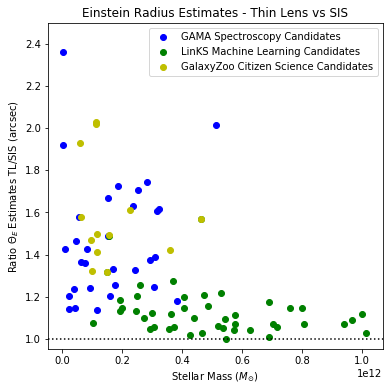

In [8]:
 # plot ratios as a function of redshift
x = np.linspace(0, 0.65, 100)
    
fig = plt.figure(figsize=(6,6))
ax = fig.subplots()
ax.scatter(spec.lambdar_mstar, spec.theta_e_pm/spec.theta_e_sis,
          label='GAMA Spectroscopy Candidates',
          color = 'b')
ax.scatter(mac.lambdar_mstar, mac.theta_e_pm/mac.theta_e_sis,
           label='LinKS Machine Learning Candidates',
          color = 'g')
ax.scatter(zoo.lambdar_mstar, zoo.theta_e_pm/zoo.theta_e_sis,
            label='GalaxyZoo Citizen Science Candidates',
          color = 'y')
ax.set_ylabel('Ratio $\Theta_E$ Estimates TL/SIS (arcsec)')
ax.set_xlabel('Stellar Mass ($M_{\odot}$)')
ax.set_ylim(0.95, 2.5)
#ax.set_xlim(10**8.5, 10**12.5)

ax.axhline(1.0,
        linestyle = ':',
          color='k')


ax.legend()
plt.title('Einstein Radius Estimates - Thin Lens vs SIS')

#plt.savefig(f'{pdf_path}/theta_e_ratio_redshift.pdf')

In [9]:
z_break = cosmo.angular_diameter_distance(0.2).value
z_break

649.2225769587195

In [10]:
B_low_high = (57.4)**(1/2) # Mpc^1/2
B_low_low = (1.90*10**6)**(1/2)
B_int = (19.1)**(1/2)

M_b = 10**(10.26)

def ratio_low_high(M, D_L):
    return B_low_high * M**(0.039) * (2)**(1/2) * (1/D_L)**(1/2)
def ratio_low_low(M, D_L):
    return B_low_low * M**(-0.181) * (2)**(1/2) * (1/D_L)**(1/2)
def ratio_int(M, D_L): 
    return B_int * M**(0.063) * (2)**(1/2) * (1/D_L)**(1/2)

def ratio(m, d_l):
    ratios = np.zeros((1000,1000))
    for i in range(1000):
        for j in range(1000):
            if d_l[j,0] < z_break:
                if m[0,i] <= M_b:
                    ratios[j,i] = ratio_low_low(m[0,i], d_l[j,0])
                if m[0,i] > M_b:
                    ratios[j,i] = ratio_low_high(m[0,i], d_l[j,0])
            if d_l[j,0] >= z_break:
                ratios[j,i] = ratio_int(m[0,i], d_l[j,0])
    return ratios



/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


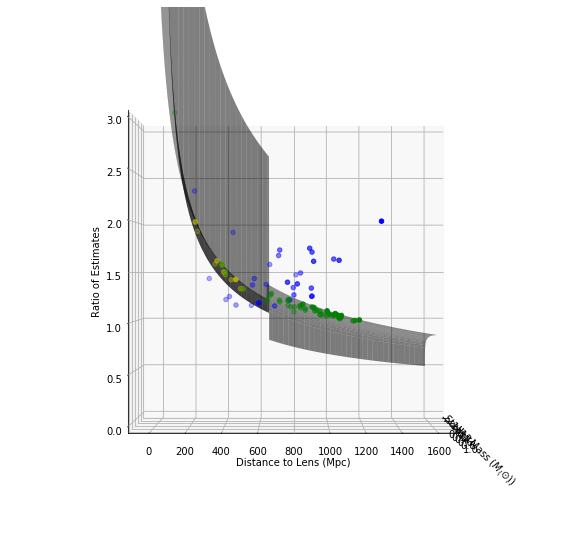

In [11]:
D_L = np.linspace(0, 1600, 1000)
M = np.linspace(10**8, 10**12, 1000)

X, Y = np.meshgrid(M, D_L)
#X = D_L
#Y = M

#f_low = ratio_low(X, Y)
#f_int = ratio_int(X, Y)
f = ratio(X, Y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_zlim(0, 3)
ax.plot_surface(X=X, Y=Y, Z=f, color='k', alpha=0.5)
ax.scatter3D(xs=spec.lambdar_mstar, ys=spec.D_lens, zs=spec.theta_e_pm/spec.theta_e_sis,
          label='GAMA Spectroscopy Candidates',
          color = 'b')
ax.scatter3D(xs=mac.lambdar_mstar, ys=mac.D_lens, zs=mac.theta_e_pm/mac.theta_e_sis,
           label='LinKS Machine Learning Candidates',
          color = 'g')
ax.scatter3D(xs=zoo.lambdar_mstar, ys=zoo.D_lens, zs=zoo.theta_e_pm/zoo.theta_e_sis,
            label='GalaxyZoo Citizen Science Candidates',
          color = 'y')
ax.set_xlabel('Stellar Mass ($M_(\odot)$)')
#ax.set_xticks(np.arange(10**9, 10**12, 10**11))
ax.set_ylabel('Distance to Lens (Mpc)')
ax.set_zlabel('Ratio of Estimates')
ax.view_init(0, 0)

In [12]:
D_L = np.linspace(0, 1600, 1000)
M = np.linspace(10**9, 10**12, 1000)

X, Y = np.meshgrid(M, D_L)
f_low = ratio_low(X, Y)
f_int = ratio_int(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_zlim(0, 3)
ax.plot_surface(X, Y, Z=f_int, color='k', alpha=0.5)
ax.scatter3D(xs=spec.lambdar_mstar, ys=spec.D_lens, zs=spec.theta_e_pm/spec.theta_e_sis,
          label='GAMA Spectroscopy Candidates',
          color = 'b')
ax.scatter3D(xs=mac.lambdar_mstar, ys=mac.D_lens, zs=mac.theta_e_pm/mac.theta_e_sis,
           label='LinKS Machine Learning Candidates',
          color = 'g')
ax.scatter3D(xs=zoo.lambdar_mstar, ys=zoo.D_lens, zs=zoo.theta_e_pm/zoo.theta_e_sis,
            label='GalaxyZoo Citizen Science Candidates',
          color = 'y')
#ax.view_init(0, 90)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_zlim(0, 3)
ax.plot_surface(X, Y, Z=f_low, color='k', alpha=0.5)
ax.scatter3D(xs=spec.lambdar_mstar, ys=spec.D_lens, zs=spec.theta_e_pm/spec.theta_e_sis,
          label='GAMA Spectroscopy Candidates',
          color = 'b')
ax.scatter3D(xs=mac.lambdar_mstar, ys=mac.D_lens, zs=mac.theta_e_pm/mac.theta_e_sis,
           label='LinKS Machine Learning Candidates',
          color = 'g')
ax.scatter3D(xs=zoo.lambdar_mstar, ys=zoo.D_lens, zs=zoo.theta_e_pm/zoo.theta_e_sis,
            label='GalaxyZoo Citizen Science Candidates',
          color = 'y')
ax.view_init(0, 0)

NameError: name 'ratio_low' is not defined

In [ ]:
Y[:,0]

In [ ]:
X[0,:]

In [ ]:
len(X)

In [13]:
f[0,:]

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, in

In [14]:
f_low[:,0]

NameError: name 'f_low' is not defined

In [15]:
spec.lambdar_mstar

0     7.632748e+10
1              NaN
2     1.517076e+11
3     4.250144e+10
4     2.437886e+11
5              NaN
6     3.098591e+11
7     3.215524e+11
8     9.387427e+09
9              NaN
10    6.240144e+10
11    8.275881e+10
12    2.269326e+10
13             NaN
14    3.169654e+11
15    1.518700e+11
16    5.117252e+11
17             NaN
18    2.532187e+11
19    1.865457e+11
20             NaN
21             NaN
22             NaN
23    2.882525e+09
24             NaN
25    1.164507e+11
26    3.840880e+11
27    1.738976e+11
28             NaN
29             NaN
30             NaN
31             NaN
32             NaN
33    3.070468e+11
34             NaN
35             NaN
36    2.919979e+11
37    1.584183e+11
38    9.294366e+10
39    2.255768e+10
40    2.364624e+11
41    2.035052e+09
42    4.000302e+10
43    2.809391e+11
44    4.639371e+10
45    5.553929e+10
46    1.693077e+11
Name: lambdar_mstar, dtype: float64

# 08/04/20 - Why do the LinKS and Zoo candidates not fall on the surface?

In [16]:
mac.loc[0]

Unnamed: 0                 0.000000e+00
GAMA_ID                    3.899011e+06
RA                         1.313340e+02
DEC                       -9.156300e-01
score                      6.400000e+01
z                          4.027000e-01
magphys_mstar              3.294000e+11
lambdar_log_mstar          1.197374e+01
lambdar_mstar              9.413210e+11
lambdar_log_mstar_error    9.760773e-02
m_half_re                  1.019917e+12
sigma_star                 3.569113e+02
D_lens                     1.067223e+03
theta_e_pm                 1.970788e+00
theta_e_sis                1.841046e+00
Name: 0, dtype: float64

In [17]:
# define a ratio function for pandas
def pandas_ratio(m, d_l):
    ratios = np.zeros(len(m))
    for i in range(len(m)):
        if d_l[i] < z_break:
            if m[i] <= M_b:
                    ratios[i] = ratio_low_low(m[i], d_l[i])
            if m[i] > M_b:
                    ratios[i] = ratio_low_high(m[i], d_l[i])
        if d_l[i] >= z_break:
            ratios[i] = ratio_int(m[i], d_l[i])
    return ratios

mac['ratio_from_paper'] = mac.theta_e_pm/mac.theta_e_sis
mac['ratio_on_surface'] = pandas_ratio(mac.lambdar_mstar, mac.D_lens)
mac[ ['ratio_from_paper', 'ratio_on_surface']]

,ratio_from_paper,ratio_on_surface
0,1.070472,1.074607
1,1.110206,1.114495
2,NaN,NaN
3,1.097315,1.101554
4,1.015996,1.019921
5,1.070474,1.074610
6,1.094743,1.098972
7,1.145717,1.150143
8,1.147522,1.151954
9,1.117971,1.122290


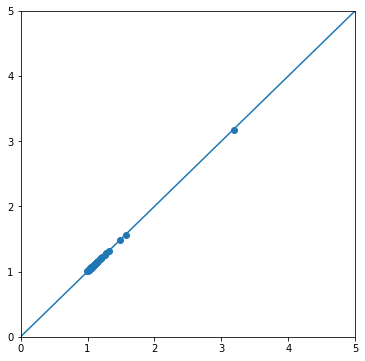

In [18]:
fig = plt.figure(figsize=(6,6))
ax = fig.subplots()
ax.scatter(mac.ratio_from_paper, mac.ratio_on_surface)
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
x=np.linspace(0, 5, 10)
ax.plot(x, x)
plt.show()

In [19]:
zoo['ratio_from_paper'] = zoo.theta_e_pm/zoo.theta_e_sis
zoo['ratio_on_surface'] = pandas_ratio(zoo.lambdar_mstar, zoo.D_lens)
zoo[ ['ratio_from_paper', 'ratio_on_surface']]

,ratio_from_paper,ratio_on_surface
0,2.022362,2.014803
1,1.413650,1.408367
2,1.613639,1.607608
3,1.468177,1.462689
4,1.493652,1.488069
5,1.318058,1.313132
6,1.419273,1.413969
7,1.319787,1.314855
8,1.570440,1.564570
9,1.928222,1.921015


In [20]:
# set up calculations
G = 6.673*10**(-11) # m^3 kg^-1 s^-2
c = 2.98*10**8 # m/s
M_sun = 1.989*10**30 #kg

np.sqrt((440.8**2 * G * c**2 * 1.989*10**30)/(1000**4 * 2 * np.pi**2 * 3.086*10**16))

1938978.4062667703

In [21]:
c

298000000.0

# I fixed it! It was just a few tired/lazy mistakes in the code... Probably didn't have to do all of that additional computation...

In [22]:
spec.lambdar_log_mstar.min()

9.308575999999999

# 08/06/20 - Redoing to plot as a function of redshift.

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


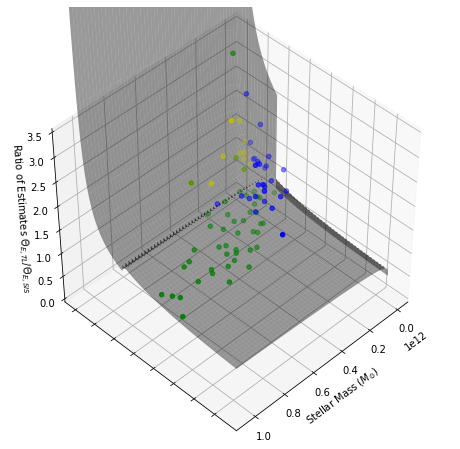

In [23]:
#D_L = np.linspace(0, 1600, 1000)
z = np.linspace(0, 0.75, 1000)
M = np.linspace(10**8, 1.05*10**12, 1000)


X, y = np.meshgrid(M, z)
#X = D_L
#Y = M
Y = cosmo.angular_diameter_distance(y).value

#f_low = ratio_low(X, Y)
#f_int = ratio_int(X, Y)
f = ratio(X, Y)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_zlim(0, 3.5)
ax.plot_surface(X=X, Y=y, Z=f, color='k', alpha=0.4)
ax.scatter3D(xs=spec.lambdar_mstar, ys=spec.z_lens, zs=spec.theta_e_pm/spec.theta_e_sis,
          label='GAMA Spectroscopy Candidates',
          color = 'b')
ax.scatter3D(xs=mac.lambdar_mstar, ys=mac.z, zs=mac.theta_e_pm/mac.theta_e_sis,
           label='LinKS Machine Learning Candidates',
          color = 'g')
ax.scatter3D(xs=zoo.lambdar_mstar, ys=zoo.z, zs=zoo.theta_e_pm/zoo.theta_e_sis,
            label='GalaxyZoo Citizen Science Candidates',
          color = 'y')
ax.set_xlabel('Stellar Mass ($M_{\odot}$)')
#ax.set_xticks(np.arange(10**9, 10**12, 10**11))
#ax.set_xticks(labels=None)
for label in ax.get_yticklabels():
    label.set_visible(False)
#ax.set_ylabel('Lens Redshift')
ax.set_zlabel('Ratio of Estimates $\Theta_{E,TL}/\Theta_{E,SIS}$')
ax.view_init(45, 45)
#plt.savefig(f'{pdf_path}3d_theta_e_ratio_0_90.pdf')
#plt.savefig(f'{png_path}3d_theta_e_ratio_0_90.png')


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


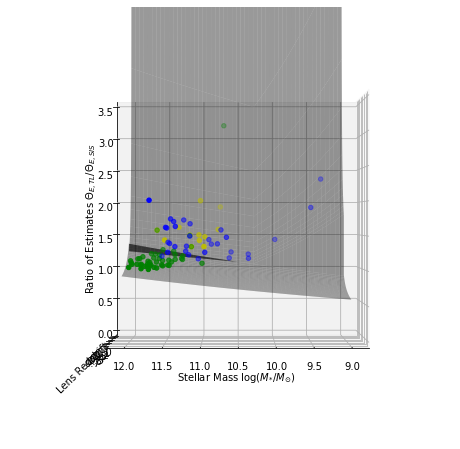

In [29]:
# same thing but with log stellar mass

#D_L = np.linspace(0, 1600, 1000)
z = np.linspace(0, 0.75, 1000)
#M = np.linspace(10**8, 1.05*10**12, 1000)
m = np.linspace(9, 12.05, 1000)

x, y = np.meshgrid(m, z)
#X = D_L
#Y = M
X = 10**x
Y = cosmo.angular_diameter_distance(y).value

#f_low = ratio_low(X, Y)
#f_int = ratio_int(X, Y)
f = ratio(X, Y)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_zlim(0, 3.5)
#ax.set_xlim(10.26, 12.05)
ax.plot_surface(X=x, Y=y, Z=f, color='k', alpha=0.4)
ax.scatter3D(xs=spec.lambdar_log_mstar, ys=spec.z_lens, zs=spec.theta_e_pm/spec.theta_e_sis,
          label='GAMA Spectroscopy Candidates',
          color = 'b')
ax.scatter3D(xs=mac.lambdar_log_mstar, ys=mac.z, zs=mac.theta_e_pm/mac.theta_e_sis,
           label='LinKS Machine Learning Candidates',
          color = 'g')
ax.scatter3D(xs=zoo.lambdar_log_mstar, ys=zoo.z, zs=zoo.theta_e_pm/zoo.theta_e_sis,
            label='GalaxyZoo Citizen Science Candidates',
          color = 'y')
ax.set_xlabel('Stellar Mass log($M_{*}/M_{\odot}$)')
#ax.set_xticks(np.arange(10**9, 10**12, 10**11))
#ax.set_xticks(labels=None)
#for label in ax.get_xticklabels():
#    label.set_visible(False)
ax.set_ylabel('Lens Redshift')
ax.set_zlabel('Ratio of Estimates $\Theta_{E,TL}/\Theta_{E,SIS}$')
ax.view_init(0, 90)
#plt.savefig(f'{pdf_path}3d_theta_e_ratio_0_90_logmass.pdf')
#plt.savefig(f'{png_path}3d_theta_e_ratio_0_90_logmass.png')


In [61]:
mac.columns

Index(['Unnamed: 0', 'GAMA_ID', 'RA', 'DEC', 'score', 'z', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error',
       'm_half_re', 'sigma_star', 'D_lens', 'theta_e_pm', 'theta_e_sis'],
      dtype='object')

In [72]:
mac.lambdar_log_mstar.max()

12.005506

In [68]:
mac

,Unnamed: 0,GAMA_ID,RA,DEC,score,z,magphys_mstar,lambdar_log_mstar,lambdar_mstar,lambdar_log_mstar_error,m_half_re,sigma_star,D_lens,theta_e_pm,theta_e_sis
0,0,3899011.0,131.33397,-0.91563,64.0,0.4027,3.294000e+11,11.973738,9.413210e+11,0.097608,1.019917e+12,356.911303,1067.222694,1.970788,1.841046
1,1,376338.0,132.98734,1.50468,30.0,0.3272,3.034000e+11,11.761424,5.773299e+11,0.116437,5.535703e+11,311.100104,932.924445,1.552917,1.398764
2,2,323152.0,130.54643,1.64325,30.0,0.7216,8.277000e+11,NaN,NaN,NaN,NaN,NaN,1441.003544,NaN,NaN
3,3,663364.0,140.35284,-0.97414,28.0,0.3221,2.688000e+11,11.644128,4.406846e+11,0.104001,3.949594e+11,288.363260,923.021510,1.318728,1.201777
4,4,3629152.0,135.88864,-0.97487,26.0,0.4059,2.129000e+11,11.630485,4.270557e+11,0.112057,3.797506e+11,285.828917,1072.436360,1.199633,1.180746
5,5,3575500.0,129.23265,-1.57512,26.0,0.3652,3.209000e+11,11.760890,5.766204e+11,0.121456,5.527200e+11,310.992625,1003.307618,1.496306,1.397798
6,6,197972.0,137.85838,-0.75280,24.0,0.3373,3.551000e+11,11.735260,5.435757e+11,0.107755,5.134140e+11,305.877874,952.210470,1.480309,1.352198
7,7,3883690.0,134.57492,-1.55142,22.0,0.2481,1.362000e+11,11.299067,1.990978e+11,0.121349,1.462938e+11,230.662876,766.024088,0.881002,0.768953
8,8,3911769.0,138.66089,-1.11639,20.0,0.2794,1.740000e+11,11.609491,4.069034e+11,0.117122,3.574842e+11,281.972703,835.581197,1.318618,1.149101
9,9,371400.0,131.20438,1.00064,18.0,0.2948,2.021000e+11,11.561134,3.640276e+11,0.129591,3.110359e+11,273.286856,868.072892,1.206736,1.079398


In [153]:
zoo.lambdar_log_mstar

0     11.043426
1     11.056287
2     11.350592
3     10.978367
4     11.192692
5     11.169208
6     11.554501
7     10.989346
8     11.663817
9     10.758240
10    11.045467
11    11.063084
12    10.787631
Name: lambdar_log_mstar, dtype: float64

In [31]:
spec.theta_e_pm.min()

0.07900386271095602